In [4]:
import pymunk
import numpy as np


class World(object):
    def __init__(self, w=10, h=20):
        self.grid = np.zeros((h, w))
        
World().grid


Loading chipmunk for Linux (64bit) [/usr/lib/python3.7/site-packages/pymunk/libchipmunk.so]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
import glob

map_files = glob.glob('map/mapdata*.txt')
map_files.sort()

def load_file(file):
    with open(file, encoding='utf-8-sig') as f:
        text = f.read()


    lines = text.split("\n")
    data = []
    cur = None
    cur_key = None
    for line in lines:
        if line.startswith('['):
            key = line[1:len(line)-1]
            cur = {}
            data.append({
                "type": key,
                "data": cur,
            })
        elif "=" in line:
            parts = line.split("=")
            cur_key = parts[0]
            cur[cur_key] = parts[1]
        else:
            cur[cur_key] += line
            
    return data

def reshape(data):
    cols = 11
    return data.reshape((int(len(data)/cols), cols))

def parse_map(file):
    layers = load_file(file)
    assert len(layers) == 2
                        
    types = reshape(np.array([
        np.uint8(float(n)) for n in layers[0]["data"]["data"].split(",")
    ]))
    health = reshape(np.array([
        np.uint8(float(n)) for n in layers[1]["data"]["data"].split(",")
    ]))
    return (types, health)

parse_map("map/mapdata131.txt")

(array([[ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  1, 34,  1,  0,  0,  0,  0],
        [ 0,  0,  0,  1, 34, 34, 34,  1,  0,  0,  0],
        [ 0,  0,  1, 34, 34, 34, 34, 34,  1,  0,  0],
        [ 0,  1, 34, 34, 34, 34, 34, 34, 34,  1,  0],
        [ 0,  1, 35, 34, 34, 34, 34, 34, 35,  1,  0],
        [ 1, 34, 30, 34, 35, 35, 35, 34, 30, 34,  1],
        [ 1,  1,  1,  1, 34, 34, 34,  1,  1,  1,  1],
        [ 1, 34,  1,  1,  1, 34,  1,  1,  1, 34,  1],
        [34, 34, 32, 32, 32, 32, 32, 32, 32, 34, 34],
        [34, 34, 38, 38, 38, 38, 38, 38, 38, 34, 34],
        [ 8, 34, 38, 38, 38, 38, 38, 38, 38, 34,  8],
        [ 0, 34, 38, 34, 38, 38, 38, 34, 38, 34,  0],
        [ 1,  1, 38, 32, 38, 24, 38, 32, 38,  1,  1],
        [ 1, 34,  1,  1,  1,  1,  1,  1,  1, 34,  1],
        [ 0,  1, 38, 36, 33, 38, 33, 36,  0,  1,  0],
        [ 1, 38,  1, 36, 38, 33, 38, 36,  1, 38,  1],
        [38, 38, 38, 36, 38, 38, 38, 36, 38, 38, 38],
        [ 1, 38, 38,  1, 37,

In [1133]:
319/11

29.0

In [6]:


show_at_once = 11


COLLTYPE_DEFAULT = 0
COLLTYPE_BRICK = 1
COLLTYPE_BALL = 2
COLLTYPE_FLOOR = 3

def handler_ball_ball(arbiter, space, data):
    return False

def handler_ball_floor(arbiter, space, data):
    space.remove(arbiter.shapes[0])
    space.num_balls -= 1
    return False
    
def handler_ball_brick(arbiter, space, data):
    brick = arbiter.shapes[1]
    x, y = brick.grid_coords
    brick.strength[y][x] -= 1
    
    # Only continue processing physics if brick isn't destroyed.
    if brick.strength[y][x] == 0:
        space.remove(brick)
        space.num_bricks -= 1
        return False
    
    return True

def build_simulation(meta, strength):
    space = pymunk.Space()
    space.gravity = 0.0, 0.0
    
    space.add_collision_handler(COLLTYPE_BALL, COLLTYPE_BALL).pre_solve = handler_ball_ball
    space.add_collision_handler(COLLTYPE_BALL, COLLTYPE_FLOOR).pre_solve = handler_ball_floor
    space.add_collision_handler(COLLTYPE_BALL, COLLTYPE_BRICK).begin = handler_ball_brick
    
    space.num_balls = 0
    space.num_bricks = 0

    def add_line(start, end):
        body = pymunk.Body(body_type=pymunk.Body.STATIC)
        shape = pymunk.Segment(body, start, end, 0.0)
        shape.elasticity = 1.0
        space.add(shape)
        return shape

    def add_box(loc, t):
        size = 0.5
        if t == 1 or t == 2:
            points = [(-size, -size), (-size, size), (size,size), (size, -size)]
        elif t == 3:
            points = [(-size, -size), (-size, size), (size, -size)]
        elif t == 4:
            points = [(-size, -size), (size,size), (size, -size)]
        elif t == 5:
            points = [(-size, size), (size,size), (size, -size)]
        elif t == 6:
            points = [(-size, -size), (-size, size), (size,size)]
        else:
            return

        body = pymunk.Body(body_type=pymunk.Body.STATIC)
        body.position = loc
        shape = pymunk.Poly(body, points) 
        shape.elasticity = 1.0
        shape.collision_type = COLLTYPE_BRICK
        space.add(shape)
        space.num_bricks += 1
        return shape

    height = show_at_once + 2
    width = 11

    # construct walls
    add_line((0, 0), (0, height))
    add_line((0, height), (width, height))
    add_line((width, height), (width, 0))
    floor = add_line((0, 0), (width, 0))
    floor.collision_type = COLLTYPE_FLOOR

    for y, row in enumerate(strength):
        for x, val in enumerate(row):
            if val > 0:
                shape = add_box((x+0.5, height-(y+1.5)), meta[y][x])
                if shape:
                    shape.grid_coords = (x, y)
                    shape.strength = strength
    
    return space

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

def draw_line(a, b):
    ax = plt.gca()
    l = mlines.Line2D([a[0],b[0]], [a[1], b[1]])
    ax.add_line(l)


def draw_space(space, strength):
    plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    plt.axis('scaled')
    plt.ylim(-1, height+1)
    plt.xlim(-1, width+1)
    
    for i, shape in enumerate(space.shapes):
        center = shape.body.position

        if isinstance(shape, pymunk.Segment):
            draw_line(shape.a, shape.b)

        elif isinstance(shape, pymunk.Poly):
            ax = plt.gca()
            verts = [ [v[0] + center[0], v[1] + center[1]] for v in shape.get_vertices() ]
            polygon = Polygon(verts, True, alpha=0.5)
            ax.add_artist(polygon)
            coords = shape.grid_coords
            plt.text(center[0], center[1], strength[coords[1]][coords[0]],
                     horizontalalignment='center',
                     verticalalignment='center')
            
        elif isinstance(shape, pymunk.Circle):
            ax = plt.gca()
            circle = Circle(center, shape.radius, color="orange")
            ax.add_artist(circle)
            
        else:
            raise RuntimeError("unknown", shape)

    plt.show()

space = build_simulation(meta, strength)
draw_space(space, strength)

NameError: name 'meta' is not defined

NameError: name 'height' is not defined

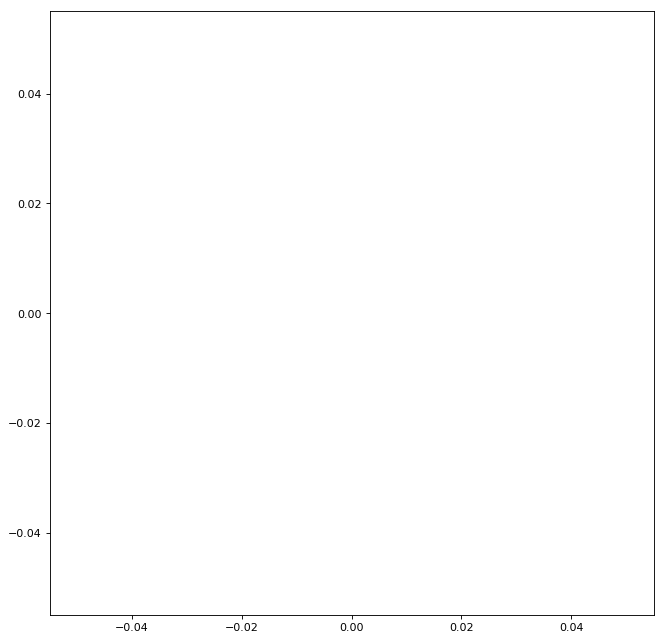

In [8]:
def add_ball(space, start_from, angle):
    body = pymunk.Body(1, 100)
    body.position = start_from, 0.25
    body.velocity = -math.cos(angle), math.sin(angle)
    shape = pymunk.Circle(body, 0.1, (0,0))
    shape.elasticity = 1.0
    shape.collision_type = COLLTYPE_BALL
    space.add(body, shape)
    space.num_balls += 1
    return shape


meta, strength = parse_map('map/mapdata108.txt')

rows = len(meta)
meta = meta[rows-show_at_once:rows]
strength = strength[rows-show_at_once:rows]

    
space = build_simulation(meta, strength)
draw_space(space, strength)

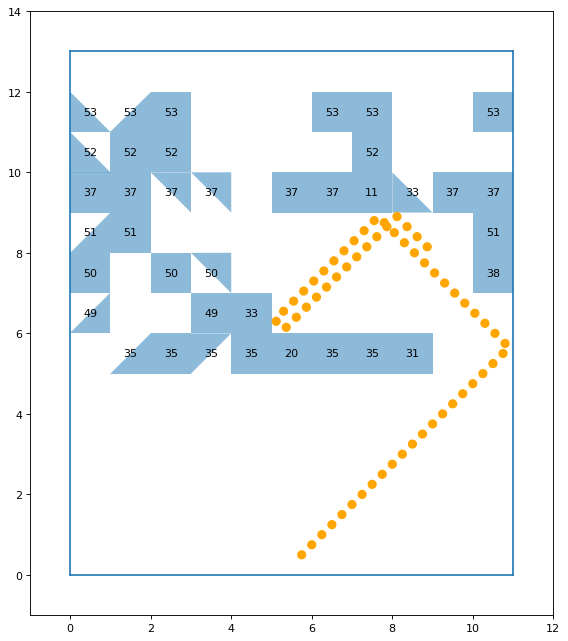

In [990]:
for i in range(60):
    add_ball(space)
    for i in range(15):
        space.step(1.0/60.0)
draw_space(space, strength)

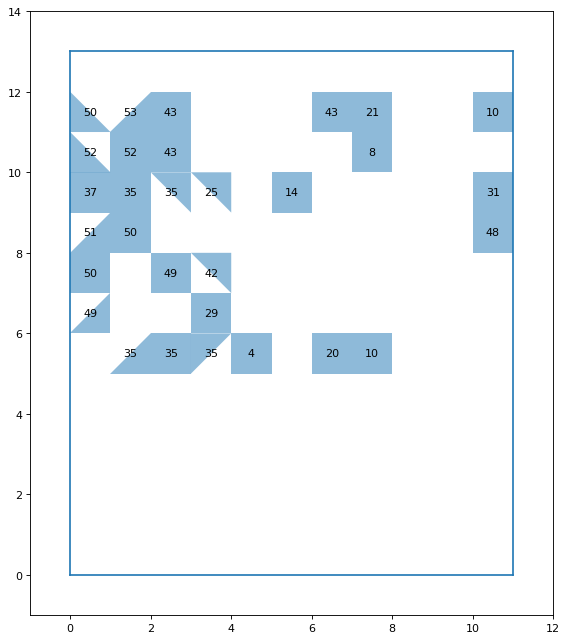

In [1087]:
for i in range(60):
    space.step(1.0/60.0)
draw_space(space, strength)

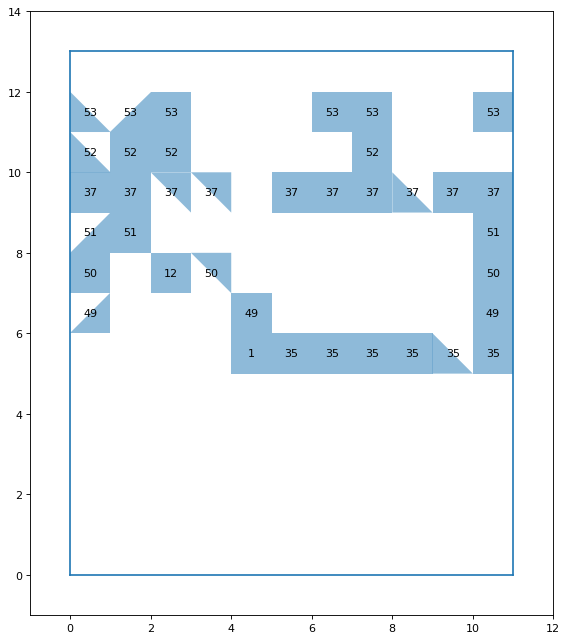

array([[53, 53, 53,  0,  0,  0, 53, 53,  0,  0, 53],
       [52, 52, 52,  0,  0,  0,  0, 52,  0,  0,  0],
       [37, 37, 37, 37,  0, 37, 37, 37, 37, 37, 37],
       [51, 51,  0,  0,  0,  0,  0,  0,  0,  0, 51],
       [50,  0, 12, 50,  0,  0,  0,  0,  0,  0, 50],
       [49,  0,  0,  0, 49,  0,  0,  0,  0,  0, 49],
       [ 0,  0,  0,  0,  1, 35, 35, 35, 35, 35, 35],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=uint8)

In [1198]:
import math


def run_simulation(meta, strength, angle = math.pi*3/8, start_from = 5.5, balls = 60, draw=False):
    final_strength = strength.copy()
    space = build_simulation(meta, final_strength)
    for i in range(60):
        add_ball(space, start_from, angle)
        for i in range(15):
            space.step(1.0/60.0)
    while space.num_balls > 0:
        space.step(1.0/60.0)
    if draw:
        draw_space(space, final_strength)
    return final_strength
    
meta, strength = parse_map('map/mapdata108.txt')

rows = len(meta)
meta = meta[rows-show_at_once:rows]
strength = strength[rows-show_at_once:rows]

final_strength = run_simulation(meta, strength)
run_simulation(meta, final_strength, draw=True)

In [1108]:
angle = math.pi*7/8
-math.cos(angle), math.sin(angle)

(0.9238795325112867, 0.3826834323650899)

In [1]:
X = []
Y = []

def play_game(state):
    origMeta, origStrength = state
        
    meta = origMeta[len(origMeta)-show_at_once:len(origMeta)].copy()
    strength = origStrength[len(origStrength)-show_at_once:len(origStrength)].copy()
    moved = 0
                                
    while np.sum(strength) > 0 or moved <= len(origStrength-show_at_once):
        angle = np.random.uniform(math.pi*1/8, math.pi*7/8)
        start_from = np.random.uniform(0.5, 10.5)
        result = run_simulation(meta, strength, angle, start_from, draw=False)
        removed = np.sum(strength - result)
        X.append((strength, angle, start_from))
        Y.append(removed)
        
        moved += 1
        
        strength = result.copy()
        strength[1:show_at_once] = strength[0:show_at_once-1]
        #print(len(origStrength), show_at_once, moved)
        strengthIdx = len(origStrength) - show_at_once - moved
        if strengthIdx >= 0:
            strength[0] = origStrength[strengthIdx]
        else:
            strength[0] = np.zeros(len(strength[0]))
        
        meta[1:show_at_once] = meta[0:show_at_once-1]
        metaIdx = len(origMeta) - show_at_once - moved
        if metaIdx >= 0:
            meta[0] = origMeta[metaIdx]
        else:
            meta[0] = np.zeros(len(meta[0]))

        
#play_game(states[2000])



In [3]:
STATES = [parse_map(f) for f in map_files]

NameError: name 'map_files' is not defined

In [2]:
i = 0
print(len(states))
while i < len(STATES):
    state = STATES[i]
    print(i, len(Y), map_files[i], len(state[0]))
    play_game(state)
    i+=1

NameError: name 'states' is not defined

In [1253]:
Y

[88,
 15,
 49,
 17,
 6,
 1,
 6,
 6,
 0,
 0,
 0,
 0,
 102,
 88,
 401,
 165,
 166,
 146,
 172,
 0,
 0,
 0,
 0,
 0,
 108,
 60,
 60,
 120,
 129,
 60,
 80,
 61,
 60,
 60,
 61,
 61,
 187,
 120,
 205,
 120,
 60,
 60,
 417,
 60,
 0,
 0,
 60,
 60,
 145,
 793,
 1079,
 61,
 1288,
 1789,
 321,
 61,
 157,
 60,
 127,
 60,
 60,
 60,
 60,
 240,
 60,
 60,
 60,
 60,
 60,
 120,
 60,
 60,
 120,
 180,
 60,
 60,
 60,
 60,
 60,
 847,
 60,
 120,
 60,
 60,
 60,
 3688,
 60,
 60,
 120,
 5209,
 244,
 305,
 147,
 60,
 205,
 2834,
 961,
 61,
 61,
 60,
 344,
 61,
 506,
 62,
 83,
 60,
 342,
 60,
 60,
 268,
 120,
 1302,
 313,
 60,
 60,
 60,
 60,
 60,
 61,
 60,
 60,
 60,
 60,
 120,
 60,
 60,
 0,
 120,
 146,
 94,
 60,
 61,
 920,
 120,
 154,
 60,
 60,
 60,
 60,
 3502,
 60,
 60,
 3753,
 60,
 321,
 246,
 61,
 106,
 60,
 60,
 289,
 60,
 60,
 60,
 60,
 120,
 60,
 469,
 1001,
 206,
 148,
 60,
 60,
 60,
 433,
 60,
 60,
 60,
 420,
 60,
 1438,
 107,
 60,
 384,
 60,
 60,
 60,
 60,
 120,
 60,
 120,
 120,
 0,
 60,
 60,
 60,
 60,
 6

In [1302]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

class SimpleCNN(torch.nn.Module):
    
    #Our batch shape for input x is (11, 32, 32)
    
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        #Input channels = 1, output channels = 18
        self.conv1 = torch.nn.Conv2d(1, 18, kernel_size=3, stride=1, padding=1)
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #4608 input features, 64 output features (see sizing flow below)
        self.fc1 = torch.nn.Linear(18 * 5 * 5, 64)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc2 = torch.nn.Linear(66, 32)
        
        self.fc3 = torch.nn.Linear(32, 1)

        
    def forward(self, x, start, angle):
        
        #Computes the activation of the first convolution
        #Size changes from (1, 11, 11) to (18, 11, 11)
        x = self.conv1(x)
        x = F.relu(x)
        
        #Size changes from (18, 11, 11) to (18, 5, 5)
        x = self.pool(x)
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from (18, 5, 5) to (1, 275)
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 18 * 5 * 5)
        
        #Computes the activation of the first fully connected layer
        #Size changes from (1, 4608) to (1, 64)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = torch.cat((x, start, angle), 1)
        
        #Computes the second fully connected layer (activation applied later)
        #Size changes from (1, 66) to (1, 1)
        x = self.fc3(self.fc2(x))
        
        return(x)
    
net = SimpleCNN()

net.forward(torch.Tensor([[X[0][0]]]), torch.Tensor([[X[0][1]]]), torch.Tensor([[X[0][2]]]))


tensor([[0.4013]], grad_fn=<AddmmBackward>)

In [1303]:
import random


cuda = torch.device('cuda')     # Default CUDA device

net = SimpleCNN().to(device=cuda)

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.MSELoss()

every = 1000

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    
    r = list(range(len(X)))
    random.shuffle(r)
    for i, j in enumerate(r):        
        x, start, angle = X[j]
        y = Y[j]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(
            torch.Tensor([[x]], device=cuda)/255, 
            torch.Tensor([[start]], device=cuda), 
            torch.Tensor([[angle]], device=cuda),
        )
        want = torch.Tensor([[y]])/255
        loss = criterion(outputs, want)
        loss.backward()
        optimizer.step()
        
        l = loss.item()
        if math.isnan(l):
            raise RuntimeError("got nan!")

        # print statistics
        running_loss += l
        if i % every == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch, i, running_loss / every))
            running_loss = 0.0

print('Finished Training')

AssertionError: Torch not compiled with CUDA enabled

In [1273]:
torch.randn(10)

tensor([-1.0081,  1.6980, -0.7275, -0.5254, -1.0293, -0.1040,  0.8233, -1.4108,
         0.4532, -0.2609])